In [ ]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2516, done.
remote: Total 2516 (delta 0), reused 0 (delta 0), pack-reused 2516 (from 1)
Receiving objects: 100% (2516/2516), 8.20 MiB | 22.10 MiB/s, done.
Resolving deltas: 100% (1575/1575), done.


In [ ]:
# Install essential libraries (if not already installed)
!pip install torch torchvision pillow matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
# Download the facades dataset from the official Pix2Pix site
!wget http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/facades.tar.gz

# Extract the dataset
!tar -xvzf facades.tar.gz


--2025-07-27 06:00:20--  http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/facades.tar.gz
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30168306 (29M) [application/x-gzip]
Saving to: ‘facades.tar.gz’

facades.tar.gz      100%[===================>]  28.77M   722KB/s    in 51s     

2025-07-27 06:01:12 (583 KB/s) - ‘facades.tar.gz’ saved [30168306/30168306]

facades/
facades/test/
facades/test/27.jpg
facades/test/5.jpg
facades/test/72.jpg
facades/test/1.jpg
facades/test/10.jpg
facades/test/100.jpg
facades/test/101.jpg
facades/test/102.jpg
facades/test/103.jpg
facades/test/104.jpg
facades/test/105.jpg
facades/test/106.jpg
facades/test/11.jpg
facades/test/12.jpg
facades/test/13.jpg
facades/test/14.jpg
facades/test/15.jpg
facades/test/16.jpg
facades/test/17.jpg
facades/test/18.jpg
facades/tes

In [ ]:
%cd pytorch-CycleGAN-and-pix2pix/
!bash ./scripts/download_pix2pix_model.sh facades_label2photo

/content/pytorch-CycleGAN-and-pix2pix
Note: available models are edges2shoes, sat2map, map2sat, facades_label2photo, and day2night
Specified [facades_label2photo]
for details.

--2025-07-28 08:40:45--  http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/facades_label2photo.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217704720 (208M)
Saving to: ‘./checkpoints/facades_label2photo_pretrained/latest_net_G.pth’

./checkpoints/facad 100%[===================>] 207.62M  38.2MB/s    in 5.8s    

2025-07-28 08:40:51 (35.5 MB/s) - ‘./checkpoints/facades_label2photo_pretrained/latest_net_G.pth’ saved [217704720/217704720]



Saving 102.jpg to 102.jpg
User uploaded file "102.jpg" with length 12998 bytes


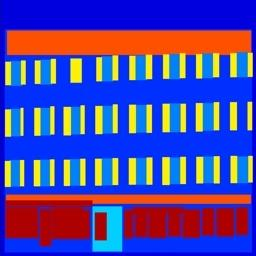

In [ ]:
from google.colab import files
from PIL import Image
import io

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  # Open the uploaded image
  img = Image.open(io.BytesIO(uploaded[fn]))
  # You can now work with the image 'img'
  # For example, display the image
  display(img)

initialize network with normal
model [Pix2PixModel] was created
loading the model from ./checkpoints/facades_label2photo_pretrained/latest_net_G.pth
---------- Networks initialized -------------
[Network G] Total number of parameters : 54.414 M
-----------------------------------------------
Input Image:


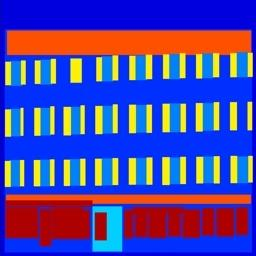


Generated Image:


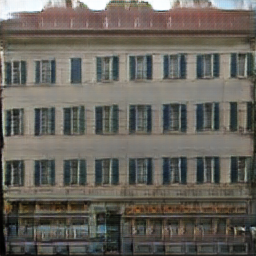

In [ ]:
import torch
import os
from options.test_options import TestOptions
from models import create_model
from PIL import Image
import torchvision.transforms as transforms

# --- Direct PyTorch Inference ---

# 1. Manually set options instead of parsing command-line arguments
class CustomOptions:
    def __init__(self):
        self.name = 'facades_label2photo_pretrained'
        self.gpu_ids = []
        self.checkpoints_dir = './checkpoints'
        self.model = 'pix2pix'
        self.input_nc = 3
        self.output_nc = 3
        self.ngf = 64
        self.ndf = 64
        self.netD = 'basic'
        self.netG = 'unet_256'
        self.n_layers_D = 3
        self.norm = 'batch'
        self.init_type = 'normal'
        self.init_gain = 0.02
        self.no_dropout = False
        self.dataset_mode = 'aligned'
        self.direction = 'BtoA'
        self.serial_batches = True
        self.num_threads = 0
        self.batch_size = 1
        self.load_size = 256
        self.crop_size = 256
        self.max_dataset_size = float("inf")
        self.preprocess = 'resize_and_crop'
        self.no_flip = True
        self.display_winsize = 256
        self.epoch = 'latest'
        self.load_iter = 0
        self.verbose = False
        self.isTrain = False
        self.eval = True


opt = CustomOptions()

# Create and set up the model
model = create_model(opt)
model.setup(opt)

# 2. Load and preprocess the uploaded image
uploaded_image_path = list(uploaded.keys())[0]
img = Image.open(io.BytesIO(uploaded[uploaded_image_path])).convert('RGB')

transform = transforms.Compose([
    transforms.Resize([opt.load_size, opt.load_size]),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
input_tensor = transform(img).unsqueeze(0)

# 3. Run inference
if opt.eval:
    model.eval()
with torch.no_grad():
    # The model expects a dictionary with keys 'A', 'B', 'A_paths', 'B_paths'
    # We can provide the same tensor for both 'A' and 'B' for testing
    data = {'A': input_tensor, 'B': input_tensor, 'A_paths': [''], 'B_paths': ['']}
    model.set_input(data)
    model.test()  # call test() instead of forward()
    visuals = model.get_current_visuals()
    output_image = visuals['fake_B']

# Convert the output tensor to a PIL image
output_image_pil = transforms.ToPILImage()(output_image.squeeze(0).cpu() * 0.5 + 0.5)

# 4. Display the output
print("Input Image:")
display(img)
print("\nGenerated Image:")
display(output_image_pil)

In [ ]:
!pip install fastapi uvicorn torch torchvision pillow python-multipart pyngrok

In [ ]:
from google.colab import userdata
ngrok_token = userdata.get('NGROK_TOKEN')

TimeoutException: Requesting secret NGROK_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.

In [ ]:
from fastapi import FastAPI, File, UploadFile, HTTPException, Request
from fastapi.responses import StreamingResponse, JSONResponse
from fastapi.middleware.cors import CORSMiddleware
import torch
import io
from PIL import Image
import torchvision.transforms as transforms
import base64
import logging
import time
import os
from contextlib import asynccontextmanager
from pyngrok import ngrok

# Add pytorch-CycleGAN-and-pix2pix to Python path
import sys
sys.path.append('/content/pytorch-CycleGAN-and-pix2pix')

# Configure logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Global model variable
model = None
model_loaded = False

class CustomOptions:
    def __init__(self):
        self.name = 'facades_label2photo_pretrained'
        self.gpu_ids = []
        self.checkpoints_dir = './checkpoints'
        self.model = 'pix2pix'
        self.input_nc = 3
        self.output_nc = 3
        self.ngf = 64
        self.ndf = 64
        self.netD = 'basic'
        self.netG = 'unet_256'
        self.n_layers_D = 3
        self.norm = 'batch'
        self.init_type = 'normal'
        self.init_gain = 0.02
        self.no_dropout = False
        self.dataset_mode = 'aligned'
        self.direction = 'BtoA'
        self.serial_batches = True
        self.num_threads = 0
        self.batch_size = 1
        self.load_size = 256
        self.crop_size = 256
        self.max_dataset_size = float("inf")
        self.preprocess = 'resize_and_crop'
        self.no_flip = True
        self.display_winsize = 256
        self.epoch = 'latest'
        self.load_iter = 0
        self.verbose = False
        self.isTrain = False
        self.eval = True

def load_model():
    """Load the model once when the app starts"""
    global model, model_loaded
    try:
        if not model_loaded:
            logger.info("Loading Pix2Pix model...")
            from models import create_model
            opt = CustomOptions()
            model = create_model(opt)
            model.setup(opt)
            model.eval()
            model_loaded = True
            logger.info("✅ Model loaded successfully")
    except Exception as e:
        logger.error(f"❌ Error loading model: {str(e)}")
        raise e

def setup_ngrok():
    """Setup ngrok tunnel"""
    try:
        # Get ngrok token from environment
        ngrok_token = os.getenv('NGROK_TOKEN')

        if ngrok_token:
            # Kill any existing ngrok processes
            ngrok.kill()

            # Set auth token
            ngrok.set_auth_token(ngrok_token)
            logger.info("✅ Ngrok auth token set successfully")

            # Create ngrok tunnel
            public_url = ngrok.connect(8000)
            logger.info(f"🌍 Public URL: {public_url}")
            logger.info(f"📚 API Documentation: {public_url}/docs")
            logger.info(f"❤️  Health Check: {public_url}/health")
            logger.info(f"🔧 Test endpoint: curl -X GET '{public_url}/health'")

            # Print tunnel info
            tunnels = ngrok.get_tunnels()
            logger.info(f"🚇 Active tunnels: {len(tunnels)}")
            logger.info(f"📊 Ngrok dashboard: http://127.0.0.1:4040")

            return public_url
        else:
            logger.warning("⚠️  NGROK_TOKEN not found in environment variables")
            logger.info("💡 Set NGROK_TOKEN environment variable for public access")
            return None

    except Exception as e:
        logger.error(f"❌ Error starting ngrok: {str(e)}")
        return None

@asynccontextmanager
async def lifespan(app: FastAPI):
    # Startup
    logger.info("🚀 Starting Pix2Pix API...")
    load_model()
    setup_ngrok()
    yield
    # Shutdown
    logger.info("🛑 Shutting down...")
    try:
        ngrok.kill()
    except:
        pass

app = FastAPI(
    title="Pix2Pix Image Generation API",
    description="Generate images using Pix2Pix model with public ngrok access",
    version="1.0.0",
    lifespan=lifespan
)

# Add CORS middleware
app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

@app.middleware("http")
async def add_process_time_header(request: Request, call_next):
    start_time = time.time()
    response = await call_next(request)
    process_time = time.time() - start_time
    response.headers["X-Process-Time"] = str(process_time)
    return response

@app.get("/", summary="API Info")
async def root():
    """Get basic API information"""
    return {
        "message": "🎨 Pix2Pix Image Generation API",
        "status": "running",
        "model_loaded": model_loaded,
        "endpoints": {
            "generate": "/generate - Generate image and return as file",
            "generate_json": "/generate_json - Generate image and return as JSON with base64",
            "health": "/health - Health check",
            "model_info": "/model_info - Model details",
            "docs": "/docs - Interactive API documentation"
        }
    }

@app.get("/health", summary="Health Check")
async def health_check():
    """Check if the API and model are working"""
    return {
        "status": "healthy" if model_loaded else "unhealthy",
        "model_loaded": model_loaded,
        "gpu_available": torch.cuda.is_available(),
        "device_count": torch.cuda.device_count() if torch.cuda.is_available() else 0,
        "timestamp": time.time()
    }

def preprocess_image(image: Image.Image) -> torch.Tensor:
    """Preprocess the input image for the model"""
    opt = CustomOptions()
    transform = transforms.Compose([
        transforms.Resize([opt.load_size, opt.load_size]),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
    return transform(image).unsqueeze(0)

def postprocess_output(output_tensor: torch.Tensor) -> Image.Image:
    """Convert model output tensor back to PIL Image"""
    return transforms.ToPILImage()(
        output_tensor.squeeze(0).cpu() * 0.5 + 0.5
    )

def run_inference(input_tensor: torch.Tensor) -> torch.Tensor:
    """Run the model inference"""
    global model
    if not model_loaded or model is None:
        raise HTTPException(status_code=500, detail="Model not loaded")

    with torch.no_grad():
        data = {
            'A': input_tensor,
            'B': input_tensor,
            'A_paths': [''],
            'B_paths': ['']
        }
        model.set_input(data)
        model.test()
        visuals = model.get_current_visuals()
        return visuals['fake_B']

@app.post("/generate", summary="Generate Image (File Response)")
async def generate_image(file: UploadFile = File(...)):
    """
    Generate an image using the Pix2Pix model and return as downloadable file
    """
    try:
        if not file.content_type or not file.content_type.startswith('image/'):
            raise HTTPException(status_code=400, detail="File must be an image")

        contents = await file.read()
        img = Image.open(io.BytesIO(contents)).convert('RGB')
        logger.info(f"Processing image: {file.filename}, size: {img.size}")

        input_tensor = preprocess_image(img)
        output_tensor = run_inference(input_tensor)
        output_image = postprocess_output(output_tensor)

        img_buffer = io.BytesIO()
        output_image.save(img_buffer, format='PNG', quality=95)
        img_buffer.seek(0)

        return StreamingResponse(
            io.BytesIO(img_buffer.read()),
            media_type="image/png",
            headers={
                "Content-Disposition": f"attachment; filename=generated_{file.filename or 'image'}.png"
            }
        )

    except Exception as e:
        logger.error(f"Error generating image: {str(e)}")
        raise HTTPException(status_code=500, detail=f"Error generating image: {str(e)}")

@app.post("/generate_json", summary="Generate Image (JSON Response)")
async def generate_image_json(file: UploadFile = File(...)):
    """
    Generate an image using the Pix2Pix model and return as JSON with base64
    """
    try:
        if not file.content_type or not file.content_type.startswith('image/'):
            raise HTTPException(status_code=400, detail="File must be an image")

        contents = await file.read()
        img = Image.open(io.BytesIO(contents)).convert('RGB')
        logger.info(f"Processing image: {file.filename}, size: {img.size}")

        input_tensor = preprocess_image(img)
        output_tensor = run_inference(input_tensor)
        output_image = postprocess_output(output_tensor)

        img_buffer = io.BytesIO()
        output_image.save(img_buffer, format='PNG', quality=95)
        img_base64 = base64.b64encode(img_buffer.getvalue()).decode()

        return {
            "success": True,
            "generated_image": f"data:image/png;base64,{img_base64}",
            "filename": file.filename,
            "original_size": img.size,
            "generated_size": output_image.size,
            "message": "Image generated successfully"
        }

    except Exception as e:
        logger.error(f"Error generating image: {str(e)}")
        raise HTTPException(status_code=500, detail=f"Error generating image: {str(e)}")

@app.get("/model_info", summary="Model Information")
async def model_info():
    """Get information about the loaded model"""
    if not model_loaded:
        raise HTTPException(status_code=503, detail="Model not loaded")

    opt = CustomOptions()
    return {
        "model_type": opt.model,
        "model_name": opt.name,
        "input_channels": opt.input_nc,
        "output_channels": opt.output_nc,
        "image_size": opt.load_size,
        "generator": opt.netG,
        "direction": opt.direction,
        "gpu_available": torch.cuda.is_available(),
        "device_count": torch.cuda.device_count() if torch.cuda.is_available() else 0
    }

/tmp/ipython-input-8-1615544428.py:92: DeprecationWarning: 
        on_event is deprecated, use lifespan event handlers instead.

        Read more about it in the
        [FastAPI docs for Lifespan Events](https://fastapi.tiangolo.com/advanced/events/).
        
  @app.on_event("startup")


ERROR:__main__:Error running server: asyncio.run() cannot be called from a running event loop
/tmp/ipython-input-8-1615544428.py:322: RuntimeWarning: coroutine 'Server.serve' was never awaited
  ngrok.kill()


In [ ]:
# Cell 1: Set up environment
import os
from google.colab import userdata

# Get ngrok token from Colab secrets
ngrok_token = userdata.get('NGROK_TOKEN')
os.environ['NGROK_TOKEN'] = ngrok_token

print("✅ Environment variables set")

✅ Environment variables set


In [ ]:
# In Colab cell - run with uvicorn
# First change to the directory
!uvicorn app:app --host 0.0.0.0 --port 8000

INFO:     Started server process [2587]
INFO:     Waiting for application startup.
INFO:app:🚀 Starting Pix2Pix API...
INFO:app:Loading Pix2Pix model...
initialize network with normal
model [Pix2PixModel] was created
loading the model from ./checkpoints/facades_label2photo_pretrained/latest_net_G.pth
---------- Networks initialized -------------
[Network G] Total number of parameters : 54.414 M
-----------------------------------------------
INFO:app:✅ Model loaded successfully
INFO:pyngrok.process:Updating authtoken for default "config_path" of "ngrok_path": /root/.config/ngrok/ngrok
INFO:app:✅ Ngrok auth token set successfully
INFO:pyngrok.ngrok:Opening tunnel named: http-8000-0998440b-8978-4a18-b39a-cc0bbc2caa24
INFO:pyngrok.process.ngrok:t=2025-07-28T08:47:03+0000 lvl=info msg="no configuration paths supplied"
INFO:pyngrok.process.ngrok:t=2025-07-28T08:47:03+0000 lvl=info msg="using configuration at default config path" path=/root/.config/ngrok/ngrok.yml
INFO:pyngrok.process.ngrok:t